#### Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit andmake a table containing R^2 value for each prepared model.

#### R&D Spend -- Research and devolop spend in the past few years
#### Administration -- spend on administration in the past few years
#### Marketing Spend -- spend on Marketing in the past few years
#### State -- states from which data is collected
#### Profit  -- profit of each state in the past few years

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [5]:
df =  pd.read_csv(r"C:\Users\ADMIN\Downloads\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [8]:
df.shape

(50, 5)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

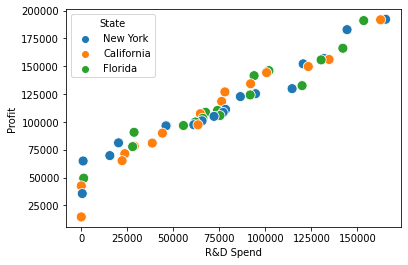

In [9]:
sns.scatterplot(data=df,x='R&D Spend', y='Profit', hue='State',s=100)

##### model preparation

In [12]:
x = df.drop(columns=["Profit"])
y = df['Profit']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state=42)

In [15]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State
46,1315.46,115816.21,297114.46,Florida
47,0.00,135426.92,0.00,California
15,114523.61,122616.84,261776.23,New York
9,123334.88,108679.17,304981.62,California
16,78013.11,121597.55,264346.06,California


### column transfer

In [16]:
transformer = ColumnTransformer(transformers=[
    ('first', OneHotEncoder(sparse_output=False), [3])
],remainder='passthrough')

In [18]:
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)

#### linear regression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(x_train_transformed,y_train)

LinearRegression()

In [22]:
y_pred =  lr.predict(x_test_transformed)

In [23]:
r2_score(y_test,y_pred)

0.9475312056915468

## ToyotaCorolla

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [27]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\ToyotaCorolla.csv")

In [28]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [29]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [31]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [32]:
df['Model'].value_counts()

Model
TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors     107
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors      83
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors        79
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors       70
TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors       43
                                                       ... 
TOYOTA Corolla 2.0D 4/5-Doors                             1
TOYOTA Corolla 1.6 16v TERRA 4/5-Doors                    1
TOYOTA Corolla 1.6 HB SOL 2/3-Doors                       1
?TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors      1
TOYOTA Corolla 1.3 Linea Terra 4/5-Doors                  1
Name: count, Length: 372, dtype: int64

In [33]:
df['Model'].value_counts().nunique()

28

In [34]:
X = df.drop(columns=['Id', 'Model', 'Price'])
y = df['Price']

In [35]:
X

,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,23,10,2002,46986,Diesel,90,1,0,2000,3,...,1,1,1,0,0,0,1,0,0,0
1,23,10,2002,72937,Diesel,90,1,0,2000,3,...,1,0,1,0,0,0,1,0,0,0
2,24,9,2002,41711,Diesel,90,1,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
3,26,7,2002,48000,Diesel,90,0,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
4,30,3,2002,38500,Diesel,90,0,0,2000,3,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,12,1998,20544,Petrol,86,1,0,1300,3,...,1,1,1,0,1,1,1,0,0,0
1432,72,9,1998,19000,Petrol,86,0,0,1300,3,...,0,0,1,0,0,1,1,0,0,0
1433,71,10,1998,17016,Petrol,86,0,0,1300,3,...,0,0,1,0,0,0,1,0,0,0
1434,70,11,1998,16916,Petrol,86,1,0,1300,3,...,0,0,0,0,0,0,1,0,0,0


C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


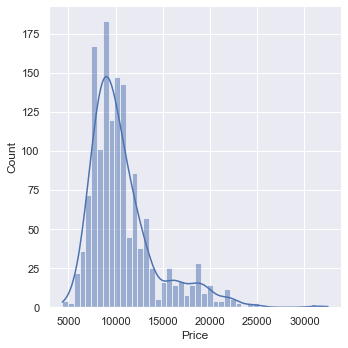

In [40]:
sns.set(style='darkgrid')
sns.displot(data=df,x='Price',kde=True)

<Axes: xlabel='Mfg_Year', ylabel='Price'>

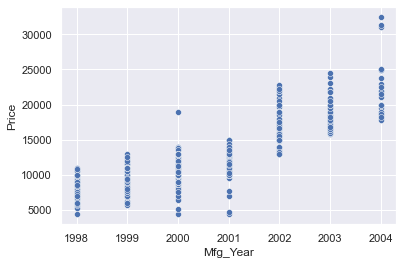

In [41]:
sns.scatterplot(data=df, x='Mfg_Year',y='Price')

<Axes: xlabel='Price', ylabel='Density'>

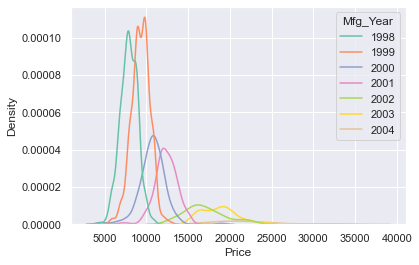

In [42]:
sns.kdeplot(data=df,x='Price' ,hue='Mfg_Year',palette='Set2')

In [43]:
X.head()

,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,23,10,2002,46986,Diesel,90,1,0,2000,3,...,1,1,1,0,0,0,1,0,0,0
1,23,10,2002,72937,Diesel,90,1,0,2000,3,...,1,0,1,0,0,0,1,0,0,0
2,24,9,2002,41711,Diesel,90,1,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
3,26,7,2002,48000,Diesel,90,0,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
4,30,3,2002,38500,Diesel,90,0,0,2000,3,...,1,1,1,0,1,0,1,0,0,0


#### train_test_split`

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### column_transfer

In [46]:
transformer = ColumnTransformer(transformers=[
    ('first', OneHotEncoder(sparse_output=False), [4]),
    
],remainder='passthrough')

In [47]:
X_train_transformed =  transformer.fit_transform(X_train)
X_test_transformed  = transformer.transform(X_test)

### linear regression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train_transformed,y_train)

LinearRegression()

In [50]:
y_pred =  lr.predict(X_test_transformed)

In [51]:
r2_score(y_test,y_pred)

0.8975058631787082